In [ ]:
install.packages('gapminder')
library(modelr)
library(tidyverse)
library(lubridate)
library(gapminder)
theme_set(theme_classic())
library(modelr)
options(repr.plot.width=8, repr.plot.height=5)

# Lecture 18: Linear regression

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will understand:**
* How to run linear regressions using `lm()`
* How to interprate the output of `summary.lm()`
* Some examples of how regression analysis is used on real data.
</div>

These notes follow Chapters 1 and 3 of [Linear Regression Using R](https://conservancy.umn.edu/bitstream/handle/11299/189222/LinearRegressionUsingR2ed_fulltext.pdf?sequence=12&isAllowed=y).

## What is a model

A statistical model is a mathematical formula that relates an outcome with one or more explanatory variables.

$$ Y = f (X) + 	\epsilon$$

* Y - outcome
* f - model function
* X - explainer
* $\epsilon$ - noise

### Model classes
The types of functions $f$ that we allow determine what is called the *model class*. For example, in STATS 250 you learned about linear regression, where $f$ is any function of the form 

$$f(x) = a_0 + a_1x $$

for some *parameters* $a_0$ and $a_1$. This defines a whole *family* of models: one for each choice of slope and intercept.

_Linear regression modeling_ is a specific form of _regression modeling_ that assumes
that the output can be explained using a linear combination of the input
values.

### Model fitting
The process of *fitting* a model refers to selecting the particular choice $a_0, a_1$ from the family of models that we have chosen, in order to best fit the data. The fitted model is the member of the model family we have selected that is "closest" to the data. This *does not* mean that this is the "true" model! In most cases there is no "true" model. The goal of a model is not to uncover truth, but to discover a simple approximation that is still useful.

### Model selection
There is also the question of which family of models to use. In other words, which types of functions $f(x)$ to use. To use a fashionable example, we could have instead chosen our model family to be 

$$\{f: \text{$f$ is a neural network}\}.$$ 

The problem of choosing a model family is known as *model selection*. It is a much trickier problem than model fitting because there is no one correct answer: "all models are wrong"; the appropriate model family balances our needs for interpretability, predictiveness, etc.

### The `lm` command

This week we will focus on the linear model (the most important model in statistics). The command to fit linear models in R is `lm()`.


`lm` is (an important) part of "base R". We also load the `modelr` package in order to make `lm` behave more like the tidyverse commands that we have seen all semester:

In [19]:
library(modelr)

The `modelr` package comes with a simple bivariate dataset that we can model:

In [20]:
sim1 %>% print

# A tibble: 30 × 2
       x     y
   <int> <dbl>
 1     1  4.20
 2     1  7.51
 3     1  2.13
 4     2  8.99
 5     2 10.2 
 6     2 11.3 
 7     3  7.36
 8     3 10.5 
 9     3 10.5 
10     4 12.4 
# … with 20 more rows


The first step is to explore the data using the techniques we have already learned:

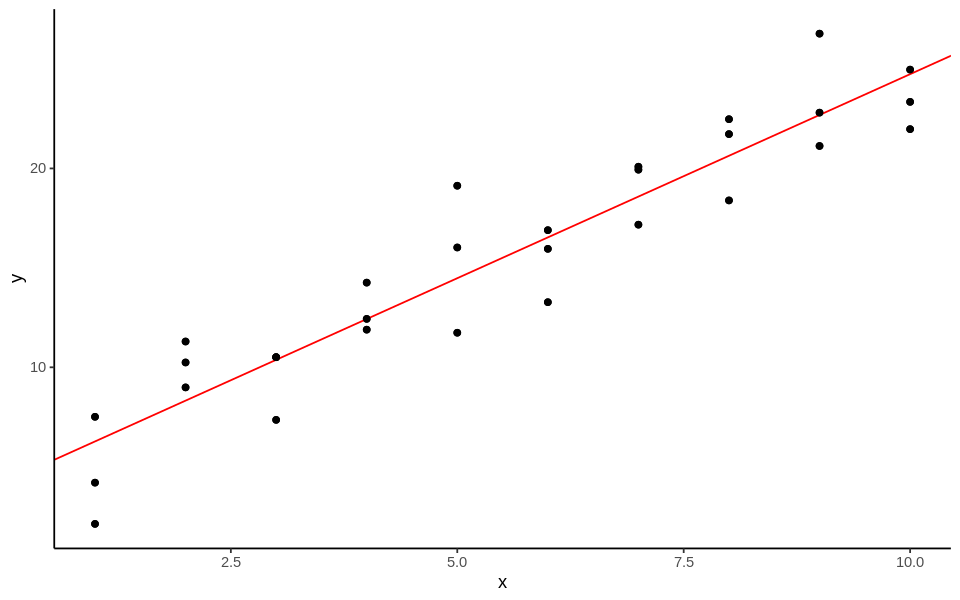

In [11]:
a0 = 4.221 
a1 = 2.052 
ggplot(sim1, aes(x, y)) + geom_point() +
  geom_abline(aes(intercept = a0, slope = a1),color = "red")+
  geom_point()


The plot suggests a strong linear relationship. We suspect that a good model might be the one we saw above: $y = a_0 + a_1x$. If we select a particular $a_0$ and $a_1$, this gives us a potential model for the data. We can plot this for various choices of $a_0$ and $a_1$ and see visually see how well it might fit:

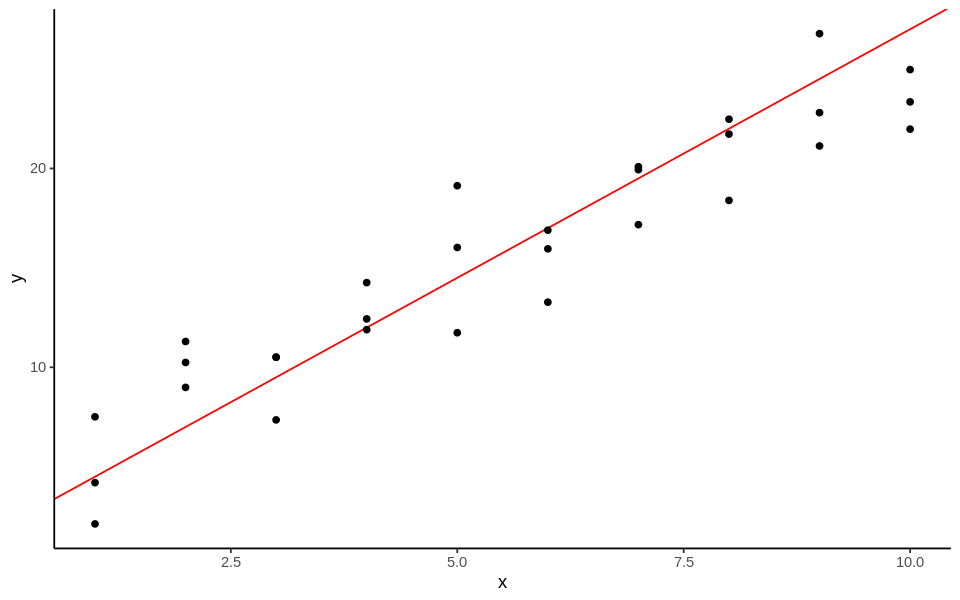

In [6]:
a0 = 2
a1 = 2.5
ggplot(sim1, aes(x, y)) + 
  geom_abline(aes(intercept = a0, slope = a1), color="red") +
  geom_point()

The red line represents the value of $y$ that we would predict for each value of $x$. To measure how good our model fit is we can do the following: for each pair of data points $(x_i,y_i)$, measure the distance $|\hat{y}_i - y_i|$ between predicted and observed values of $y_i$. 

The value $\hat{y}_i - y_i$ is called the *residual*. It's the component of the data that isn't predicted by our model. Adding up the residuals gives us a measure of how good our model fits the data. If we predict the data perfectly ($\hat{y}_i = y_i$ for all $i$) then this would equal zero, so lower values are better. (Next week, we  will see that this is only true up to a point; it is generally not a good idea to fit the data perfectly.)

To fit a linear model in R, we use a special *formula syntax* which is denoted by the `~`:

    lm(y ~ x, data)
    
says regress `data$y` on `data$x`.

In [21]:
mdl <- lm(y ~ x, data = sim1) %>% print


Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  



This says that the best-fitting linear model has $\hat{a}_0=4.22$ and $\hat{a}_1=2.052$. 

In what sense is this model "the best"? It means that over _all possible_ choice of $a_0,a_1$, the ones selected by `lm()`, which we call $\hat{a}_0$ and $\hat{a}_1,$ minimize the squared error:

$$\sum_i \big[ \underbrace{y_i}_{\text{observed}} - \underbrace{(\hat{a}_0 + \hat{a}_1 x_i)}_{\text{predicted}}\big]^2$$

We can use the function `add_predictions()` to add the predicted values into the original data frame:

In [13]:
sim1 %>% add_predictions(mdl) %>% print

# A tibble: 30 × 3
       x     y  pred
   <int> <dbl> <dbl>
 1     1  4.20  6.27
 2     1  7.51  6.27
 3     1  2.13  6.27
 4     2  8.99  8.32
 5     2 10.2   8.32
 6     2 11.3   8.32
 7     3  7.36 10.4 
 8     3 10.5  10.4 
 9     3 10.5  10.4 
10     4 12.4  12.4 
# … with 20 more rows


## 🤔 Quiz

```
Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  
```

According to this model, what is the predicted value of $y$ when $x = 9.9$?

<ol style="list-style-type: upper-alpha;">
    <li>51.7871</li>
    <li>24.736</li>
    <li>24.531</li>
    <li>20.12</li>
</ol>

In [22]:
# predicted value
siml %>% bind_rows (tibble(x=9.9))%>% add_predictions(mdl)%>%tail

ERROR: ignored

### Summarizing the linear model
The main tool we have to understand the output of `lm` is the `summary` function:

In [23]:
summary(mdl)


Call:
lm(formula = y ~ x, data = sim1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1469 -1.5197  0.1331  1.4670  4.6516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2208     0.8688   4.858 4.09e-05 ***
x             2.0515     0.1400  14.651 1.17e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.203 on 28 degrees of freedom
Multiple R-squared:  0.8846,	Adjusted R-squared:  0.8805 
F-statistic: 214.7 on 1 and 28 DF,  p-value: 1.173e-14


In most cases, the part you are most interested in is the "Coefficients" section:

```
Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2208     0.8688   4.858 4.09e-05 ***
x             2.0515     0.1400  14.651 1.17e-14 ***
```

The `Estimate` column contains the fitted values. This says that a one-unit increase in `x` is predicted to increase `y` by 2.05. The `(Intercept)` term is the predicted value of `y` when `x=0`.

### Standard errors
The standard errors, $t$-values, and $p$-values measure the degree of certainty about the estimates in the `Estimate` column.
- Since the standard error of the `x` coefficient is 0.1400, this says that with a high degree of certainty, the "true" estimate lies is the interval $2.05 \pm 2 \times 0.14$ (say). 
- The `p`-value, shown here as `Pr(>|t|)`, is the probability of observing this value under the null hypothesis that the true value is actually zero. We see that this is extremely unlikely: both the mean and the slope are significantly different from zero.
- Next to the `p`-value are different numbers of `*`s depending on whether the coefficient is significant at the .1%/1%/5% level.

### Residuals

The residual is the difference between the predicted and observed value:

$$\text{resid}_i = y_i - \hat{y}_i = y_i - (a_0 + a_1 x_i).$$

(Thus, from two slides up, linear regression minimizes the *sum of squared residuals*.)


The linear modal summary gives some information about the distribution of the residuals:

```
Residuals:
    Min      1Q  Median      3Q     Max 
-4.1469 -1.5197  0.1331  1.4670  4.6516 
```

If the linear model is correct, we would expect residual values that are normally distributed
around a mean of zero, median value near zero,
minimum and maximum values of roughly the same magnitude, and first
and third quartile values of roughly the same magnitude. The `Residuals` section of the linear model summary shows us these statistics. 
(Why isn't the mean shown?)

Remember, the linear model formally assumes that the residuals are normally distributed. If that is true, then the distribution should be symmetric with a median of around zero. The numbers shown here help you to assess that.


If we turn the original linear model around, we have

$$y_i - (a_0 +  a_1 x_i) = \text{noise}.$$

So, it should be the case that, if we plot the distribution of the residuals, it looks "normal".

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


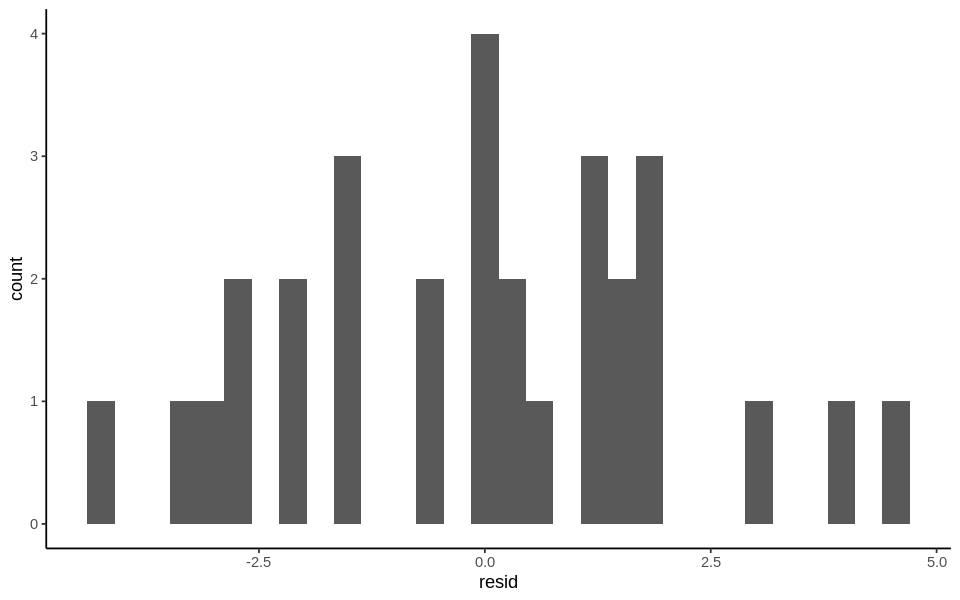

In [24]:
sim1 %>% add_residuals(mdl) %>% ggplot + geom_histogram(aes(x=resid))

If the model has done a good job of capturing patterns in the data, then the residuals should look like random noise. 

In other words, if the residuals contain obvious patterns, then there is more modeling work to be done! You should confirm this by visualizing the residuals.

Let's see an example where the residuals look very non-normal:

In [25]:
df <- tibble(x = rnorm(n = 100), y = x + rexp(n=100))
fit <- lm(y ~ x, df)
summary(fit)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0081 -0.7089 -0.3011  0.2612  3.6826 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.97818    0.10186   9.603 8.78e-16 ***
x            1.03150    0.09886  10.434  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.016 on 98 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.5214 
F-statistic: 108.9 on 1 and 98 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


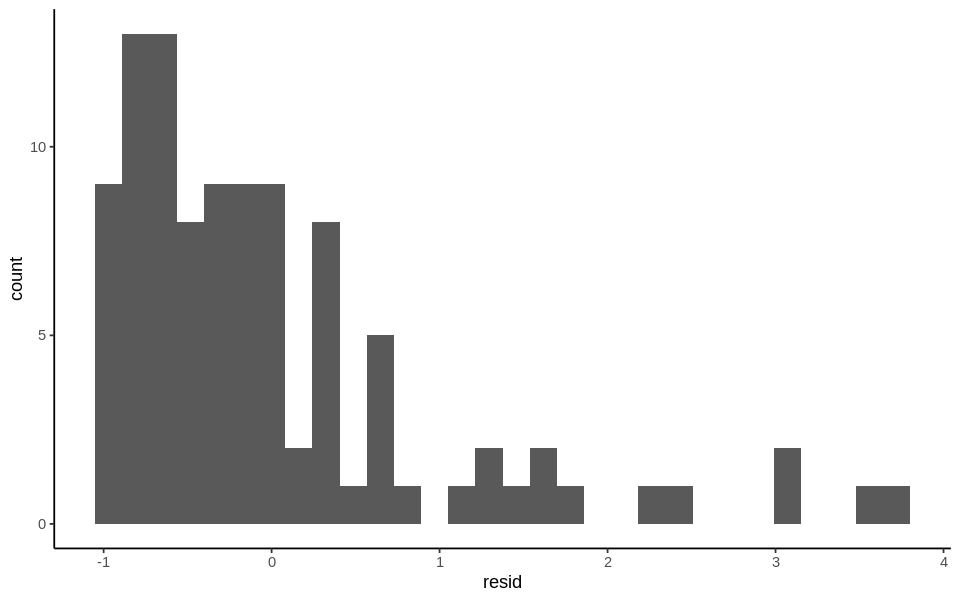

In [26]:
df %>% add_residuals(fit) %>% ggplot() + geom_histogram(aes(x=resid))

If you saw this in real data, it would be a signal that the simple linear model is not appropriate.

### Measures of goodness-of-fit

The last few lines of the summary output contain some information about the overall fit of the linear model to this data set:

```
Residual standard error: 2.203 on 28 degrees of freedom
Multiple R-squared:  0.8846,	Adjusted R-squared:  0.8805 
F-statistic: 214.7 on 1 and 28 DF,  p-value: 1.173e-14
```

- Degrees of freedom (`df`) is the number of observations minus the number of estimated parameters.
- The residual standard error is $\sqrt{\sum_i (\hat{y}_i - y_i)^2 / \text{df}}$.
- R-squared: `1 - SSE / SSy`
- Adjusted R-squared takes into account the number of predictors that were used. 
- F-statistic: test of the hypothesis that *all* of the coefficients in the model are simultaneously zero.

Remember that R-squared always goes up as you add more variables! 

In [ ]:
lm(y ~ x2, sim4) %>% summary


Call:
lm(formula = y ~ x2, data = sim4)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7935 -1.6009 -0.0075  1.7413  6.5397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03546    0.13904   0.255    0.799    
x2          -2.78252    0.21783 -12.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.408 on 298 degrees of freedom
Multiple R-squared:  0.3538,	Adjusted R-squared:  0.3516 
F-statistic: 163.2 on 1 and 298 DF,  p-value: < 2.2e-16


In [ ]:
# R-squared
sim1 %>% add_residuals(mdl) %>% summarize(SSy = sum((y - mean(y))^2), SSe = sum(resid^2)) %>% 
    mutate(R2 = 1 - SSe / SSy)

SSy,SSe,R2
<dbl>,<dbl>,<dbl>
1177.55,135.8746,0.8846124


## 🤔 Quiz

```
Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7935 -1.6009 -0.0075  1.7413  6.5397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03546    0.13904   0.255    0.799    
x2          -2.78252    0.21783 -12.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.408 on 298 degrees of freedom
Multiple R-squared:  0.3538,	Adjusted R-squared:  0.3516 
F-statistic: 163.2 on 1 and 298 DF,  p-value: < 2.2e-16
```

How many non-missing observations are there in `df`?

<ol style="list-style-type: upper-alpha;">
    <li>200</li>
    <li>298</li>
    <li>300</li>
    <li>302</li>
</ol>

All of the goodness-of-fit measures shown above in some way measure the amount of signal in your data relative to the amount of noise. 

To see this, let's study the effect of adding progressively more noise to a made-up data set.

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = y ~ x, data = df.sigma)

Residuals:
     Min       1Q   Median       3Q      Max 
-273.135  -85.026   -0.619   80.481  298.904 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -21.624     11.060  -1.955   0.0534 .
x             -2.645     11.041  -0.240   0.8112  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 108.8 on 98 degrees of freedom
Multiple R-squared:  0.0005852,	Adjusted R-squared:  -0.009613 
F-statistic: 0.05739 on 1 and 98 DF,  p-value: 0.8112


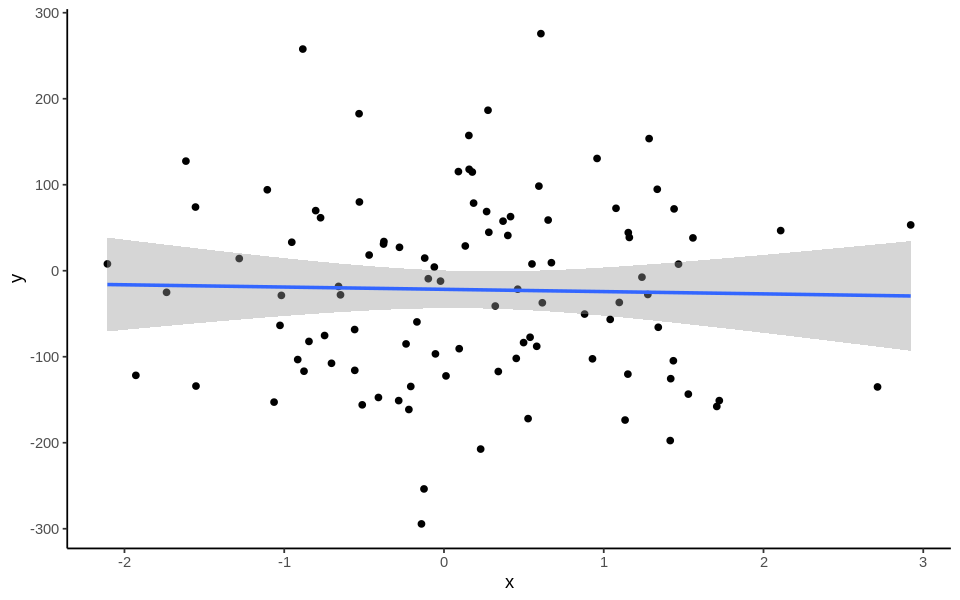

In [27]:
sigma <- 100  # noise level
df.sigma <- tibble(x = rnorm(n = 100), y = x + rnorm(n = 100, sd = sigma)) 
ggplot(df.sigma, aes(x = x, y = y)) + geom_point() + geom_smooth(method = "lm")
lm(y ~ x, df.sigma) %>% summary

## Regression example #1: CPU DB database 

The first dataset we will use to practice regression comes from the book. It consists of data on computer processors and performance-related metrics.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Intel_CPU_Core_i7_12700K_Alder_Lake_perspective.jpg/1280px-Intel_CPU_Core_i7_12700K_Alder_Lake_perspective.jpg' width=600 />



In [29]:
load(url('https://datasets.stats306.org/cpus.RData'))

### Available dataframes

* The data frame **int00.dat** contains the data from the CPU DB database
for all of the processors for which performance results were available for
the SPEC Integer 2000 (Int2000) benchmark program. 
* fp00.dat contains the data for the processors that executed the Floating-Point 2000 (Fp2000) benchmarks

and so on.

We will use `int00.dat` in this lesson and now let us take a look at the first few records of this dataframe

In [30]:
int00.dat %>% head

nperf,perf,clock,threads,cores,TDP,transistors,dieSize,voltage,featureSize,channel,FO4delay,L1icache,L1dcache,L2cache,L3cache
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
11.07218,425.6607,1200,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
11.48725,438.0000,1300,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
12.96734,482.0000,1333,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
13.40464,495.0000,1400,1,1,56,NA,120,1.8,0.18,0.10,36.0,64,64,256,NA
39.33987,1266.0000,2000,1,1,NA,NA,NA,NA,0.13,0.07,25.2,64,64,1024,NA
39.44078,1269.0000,2600,1,1,NA,NA,NA,NA,0.13,0.07,25.2,64,64,1024,NA


Variables:
* _nperf_ -  Normalized performance
* _perf_ - SPEC performance
* _clock_ - Clock frequency (MHz)
* _threads_ - Number of hardware threads available
* _cores_ - Number of hardware cores available
* _TDP_ - Thermal design power
* _transistors_ - Number of transistors on the chip (M)
* _dieSize_ - The size of the chip
* _voltage_ - Nominal operating voltage
* _featureSize_ - Fabrication feature size
* _channel_ - Fabrication channel size
* _FO4delay_ - Fan-out-four delay
* _L1icache_ - Level 1 instruction cache size
* _L1dcache_ - Level 1 data cache size
* _L2cache_ - Level 2 cache size
* _L3cache_ - Level 3 cache size

### `perf` vs. `clock`
`perf` measure performance and `clock` measures clock speed. Are they linearly related?


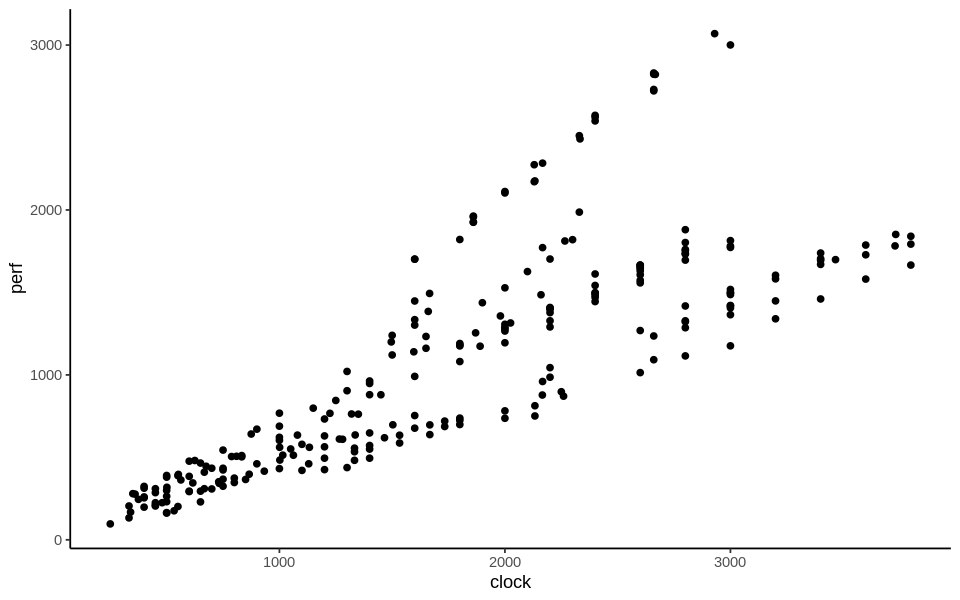

In [33]:
ggplot(int00.dat, aes(x=clock, y= perf)) + geom_point(aes(x=clock, y=perf))


Let's consider the simple model:

$$\text{perf} = a_0 + a_1 \cdot \text{clock}.$$

To find the best-fitting $a_0$ and $a_1$, regress `perf` on `clock` using `lm()`.

In [32]:
int00.lm <- lm(perf ~ clock, data = int00.dat)
int00.lm


Call:
lm(formula = perf ~ clock, data = int00.dat)

Coefficients:
(Intercept)        clock  
    51.7871       0.5863  


## 🤔 Quiz

What is the value of $a_0$ determined by linear regression from the `int00.dat` data?

<ol style="list-style-type: upper-alpha;">
    <li>51.7871</li>
    <li>.5863</li>
    <li>.1251</li>
    <li>42</li>
</ol>


We can use `geom_smooth()` to plot the regression line atop the data:

`geom_smooth()` using formula = 'y ~ x'


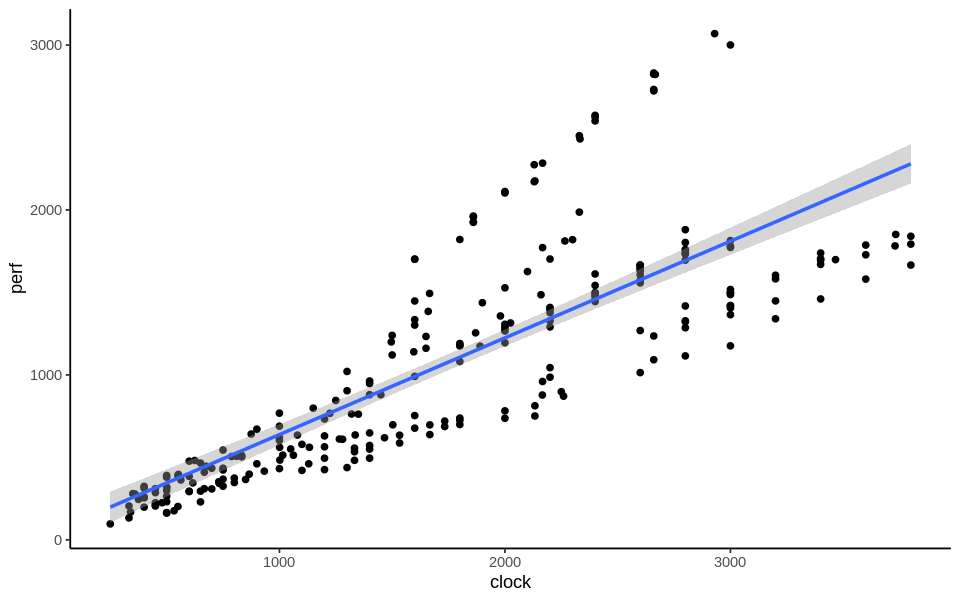

In [34]:
ggplot(int00.dat, aes(x=clock, y=perf)) + geom_point() + geom_smooth(method = "lm")

Now let's summarize the regression:

In [35]:
summary(int00.lm)


Call:
lm(formula = perf ~ clock, data = int00.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-634.61 -276.17  -30.83   75.38 1299.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.78709   53.31513   0.971    0.332    
clock        0.58635    0.02697  21.741   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 396.1 on 254 degrees of freedom
Multiple R-squared:  0.6505,	Adjusted R-squared:  0.6491 
F-statistic: 472.7 on 1 and 254 DF,  p-value: < 2.2e-16


### Estimates
The `Estimate` column contains the fitted values ($\hat{a}_0$ and $\hat{a}_1$) in the notation above. This says that a one-unit increase in `clock` is predicted to increase `perf` by 0.586. The `(Intercept)` term is the predicted value of `perf` when `clock=0`.

### Standard errors
- Since the standard error of the `clock` coefficient is 0.027, this says that with a high degree of certainty, the "true" estimate lies is the interval $0.586 \pm 3 \times 0.14$ (say). 

### Model fit:
- The residual standard error is high (about 400) relative to the scale of perf (1000-2000)
- $R$-squared is .65, which is neither high nor low.

Next, let's visualize the residuals:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


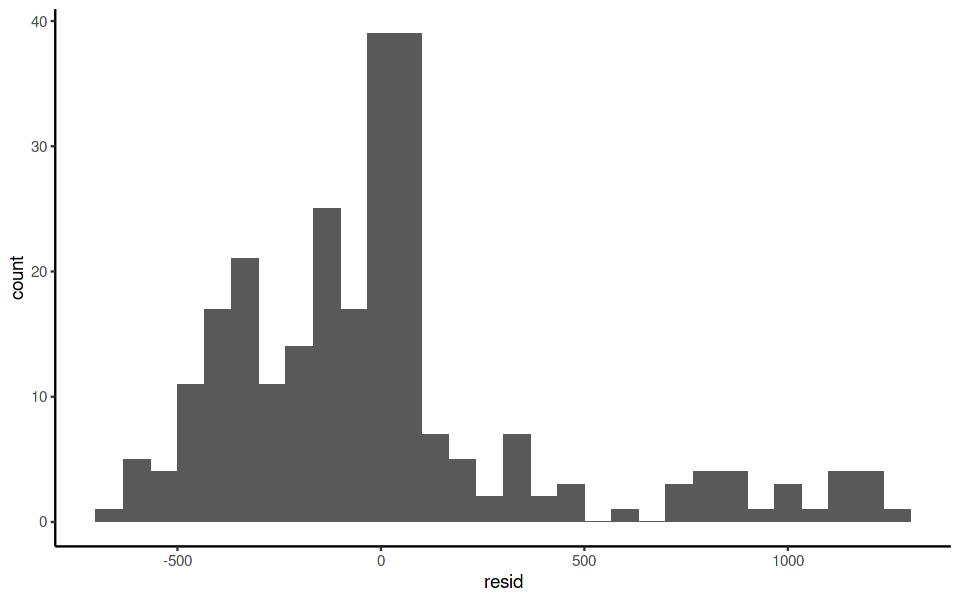

In [ ]:
int00.dat %>% add_residuals(int00.lm) %>% ggplot + geom_histogram(aes(x=resid))

As you could probably already guess from looking at the plot of `perf` vs. `clock`, the residuals do not appear to be normally distributed. 

### Residual vs. fitted

Next let's consider a plot of the residuals versus the fitted values:

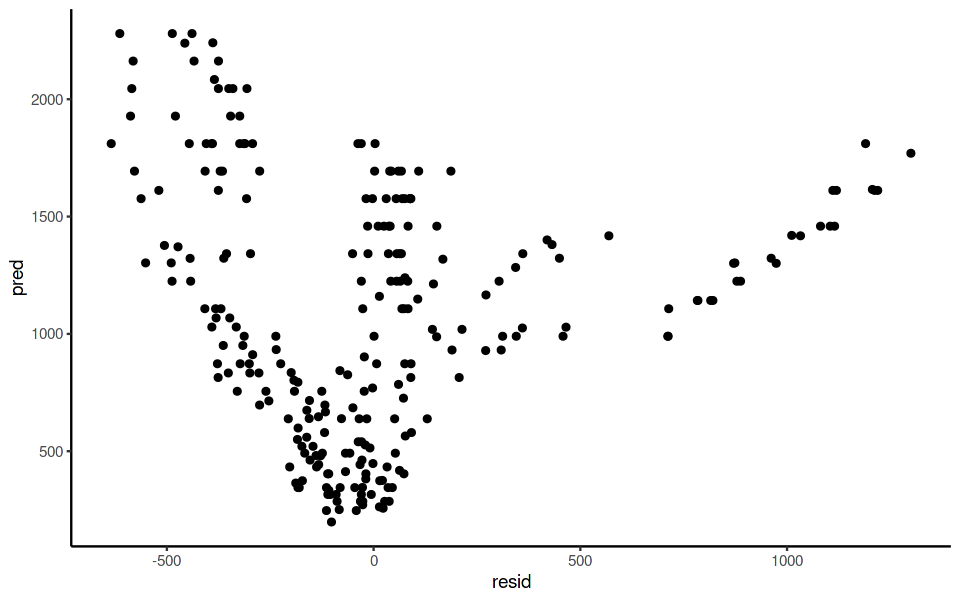

In [ ]:
int00.dat %>% add_residuals(int00.lm) %>% add_predictions(int00.lm) %>% 
    ggplot() + geom_point(aes(x = resid, y = pred))

The linear model says that, after accounting for the predictors, the remaining variation should look like pure noise. So:

- If the linear model is correct, then ther should be *no discernible relationship* between the predictors and the residuals. 
- (The fitted values are linear functions of the predictors.)
- If there are obvious patterns, then the model is probably not correct.

Here we see that:

* The residuals have increasing variance for larger values of `clock`.
* There are several "clusters" of residuals.

It is likely that _clock_ alone is not sufficient to fully explain the outcome variable.

In [ ]:
int00.dat %>% head

nperf,perf,clock,threads,cores,TDP,transistors,dieSize,voltage,featureSize,channel,FO4delay,L1icache,L1dcache,L2cache,L3cache
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
11.07218,425.6607,1200,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
11.48725,438.0000,1300,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
12.96734,482.0000,1333,1,1,NA,NA,NA,NA,0.18,0.10,36.0,64,64,256,NA
13.40464,495.0000,1400,1,1,56,NA,120,1.8,0.18,0.10,36.0,64,64,256,NA
39.33987,1266.0000,2000,1,1,NA,NA,NA,NA,0.13,0.07,25.2,64,64,1024,NA
39.44078,1269.0000,2600,1,1,NA,NA,NA,NA,0.13,0.07,25.2,64,64,1024,NA


What explains the weird patterns we're seeing in the data and residuals? Hint:

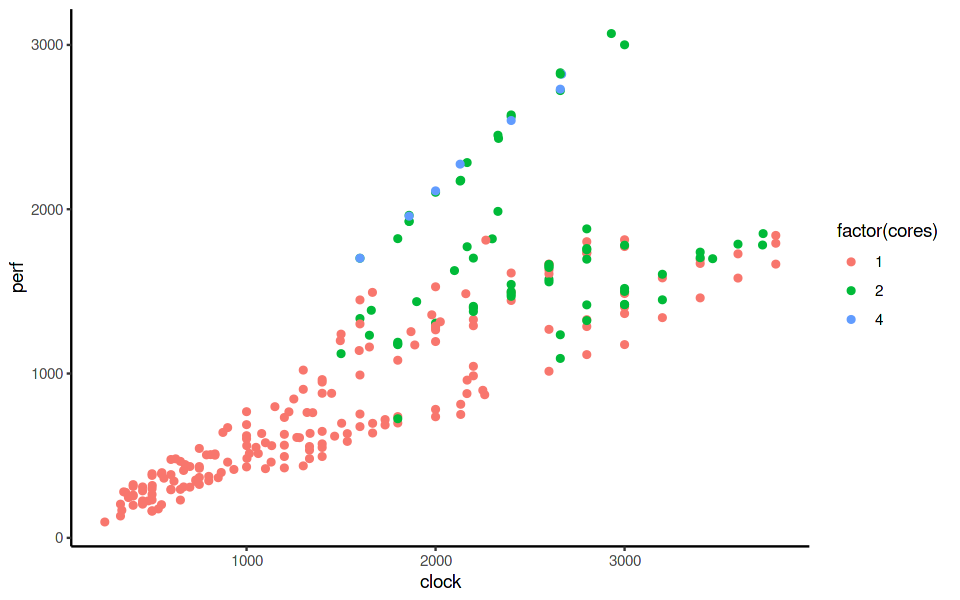

In [ ]:
int00.dat %>% ggplot(aes(x = clock, y = perf, color = factor(cores))) + geom_point()

Next lecture we'll talk about multiple linear regression, which let's us take into account multiple predictors at a time.

## Regression example #2: Modeling the price of diamonds
Next we will use linear regression to study the relationship between the price and weight of diamonds.

In [37]:
diamonds %>% print

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


Let's visualize the relationship between price and weight (`carat`) of diamonds:

Warning message:
“Computation failed in `stat_binhex()`
Caused by error in `compute_group()`:
! The package "hexbin" is required for `stat_binhex()`”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


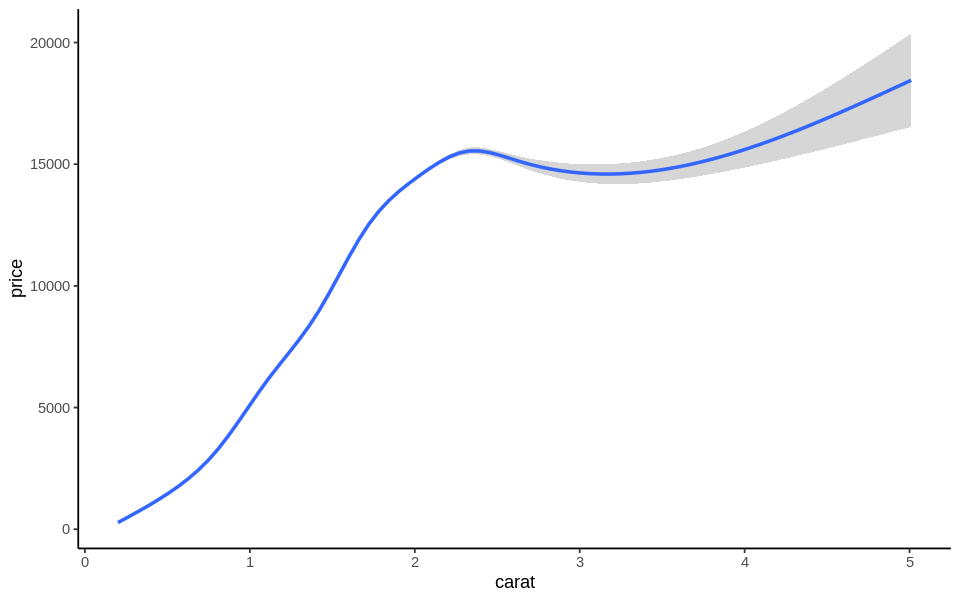

In [36]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_hex() + geom_smooth()

The smoothing line suggests that relationship between price and carat is not necessarily linear. 

In [39]:
dm.lm <- lm(log(price) ~ log(carat), data = diamonds)
summary(dm.lm)


Call:
lm(formula = log(price) ~ log(carat), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50833 -0.16951 -0.00591  0.16637  1.33793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.448661   0.001365  6190.9   <2e-16 ***
log(carat)  1.675817   0.001934   866.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2627 on 53938 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.933 
F-statistic: 7.51e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


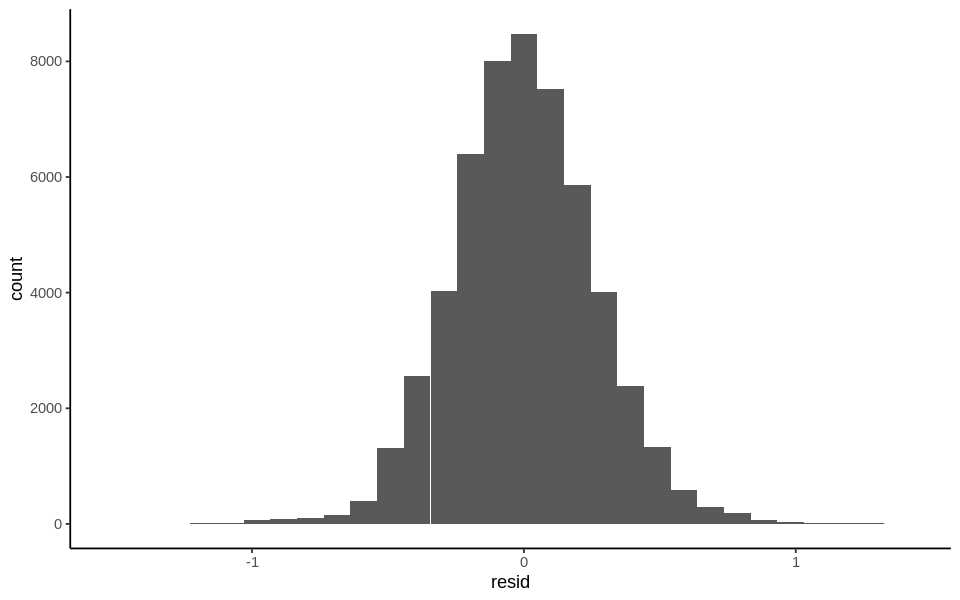

In [40]:
diamonds %>% add_residuals(dm.lm) %>% ggplot + geom_histogram(aes(x=resid))

Sometimes, a linear relationship emerges if we first transform the data in a certain way. Let's see what happens if we consider $\log(\text{price})$ vs. $\log(\text{carat})$.

## 🤔 Quiz

According to the model `lm(log(price) ~ log(carat), data = diamonds)`, what is the predicted _price_ (not log(price)) of a 1-carat diamond?


<ol style="list-style-type: upper-alpha;">
    <li>\$8.45</li>
    <li>\$10.12</li>
    <li>\$4,668.82</li>
    <li>\$24,946.22</li>
</ol>

In [ ]:
# price of diamond
coefficients(dm,lm)
log 

## Regression example #3: Forecasting population growth

Next let's use regression to study human population growth. We have already seen the `population` table earlier in the semester, which contains historical population information for many countries:


In [41]:
population %>% head

country,year,population
<chr>,<dbl>,<dbl>
Afghanistan,1995,17586073
Afghanistan,1996,18415307
Afghanistan,1997,19021226
Afghanistan,1998,19496836
Afghanistan,1999,19987071
Afghanistan,2000,20595360


We'll use the following table which is the same data source but more complete:

In [42]:
pop <- read_csv("https://datasets.stats306.org/population-and-demography.csv.gz")


Rows: 18288 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country name
dbl (21): Year, Population, Population of children under the age of 1, Popul...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In the absence of any resource constraints, ecological theory predicts that a population will grow *exponentially*: if every individual has (say) 2 children, then the population doubles in size at each generation. However, in real life, the environment has a certain *carrying capacity* which limits the a population's ability to grow. 

In [43]:
logistic_growth <- function(t, growth_rate, carrying_cap, initial_size = 1, t0 = 0) {
    carrying_cap / (
        1 + (carrying_cap - initial_size) / initial_size * exp(-growth_rate * (t - t0))
    )
}

Warning message:
“Removed 49 rows containing missing values (`geom_function()`).”


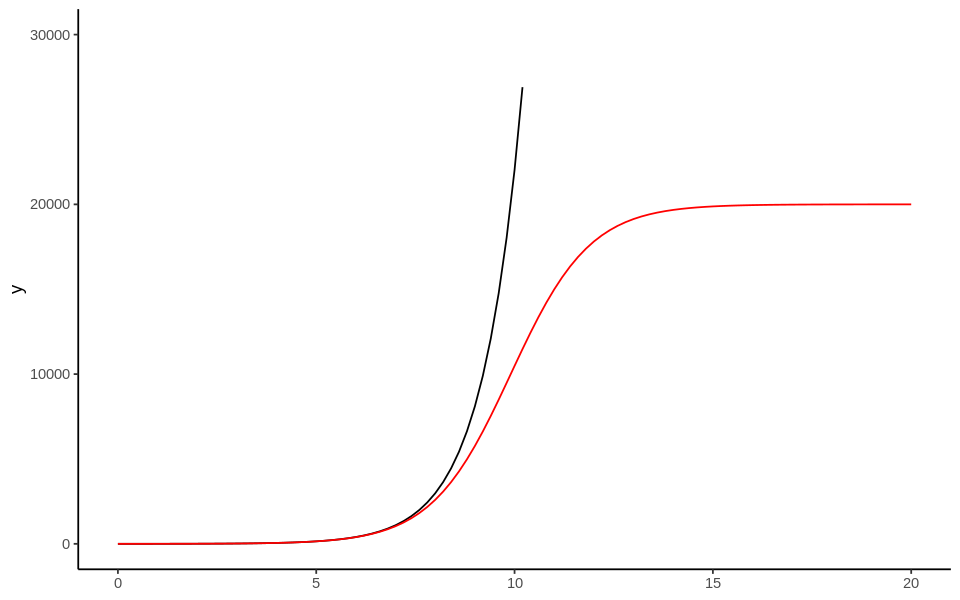

In [44]:
ggplot() + geom_function(fun = exp, colour = "black") +
    geom_function(fun = \(x) logistic_growth(x, 1, 20000), color = "red") + 
    xlim(c(0, 20)) + ylim(c(0, 3e4))

Let's use the logistic growth model to study the population growth of India. 

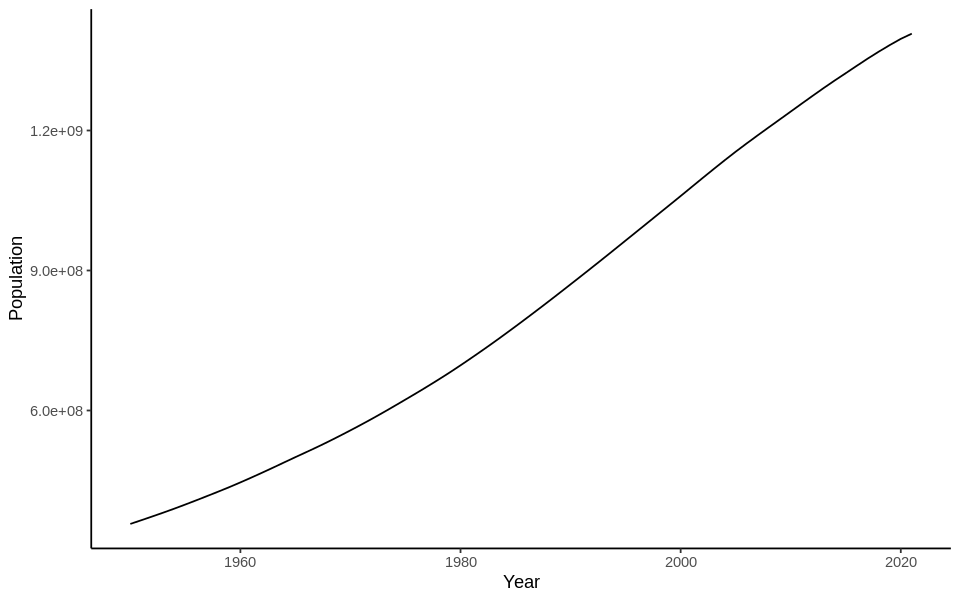

In [45]:
pop.ind <- filter(pop, `Country name` == "India")
pop.ind %>% ggplot(aes(x=Year, y=Population)) + geom_line()

We will let $P(t)$ be the population of India in year $t$. (We observe this.) Mathematically, the logistic growth model satisfies a *differential equation*:
$$\frac{dP/dt}{P} = r \left(1 - \frac{P}{K}\right)$$
If we somehow knew how to calculate the left-hand side of this equation, then this would be a linear regression!
$$\underbrace{Y_t}_{?} = \underbrace{r}_{a_0} - \underbrace{(r/K)}_{a_1} P_t$$


The only missing piece of information is the derivative, $dP/dt$. A reasonable estimator is the change in population for each year:

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


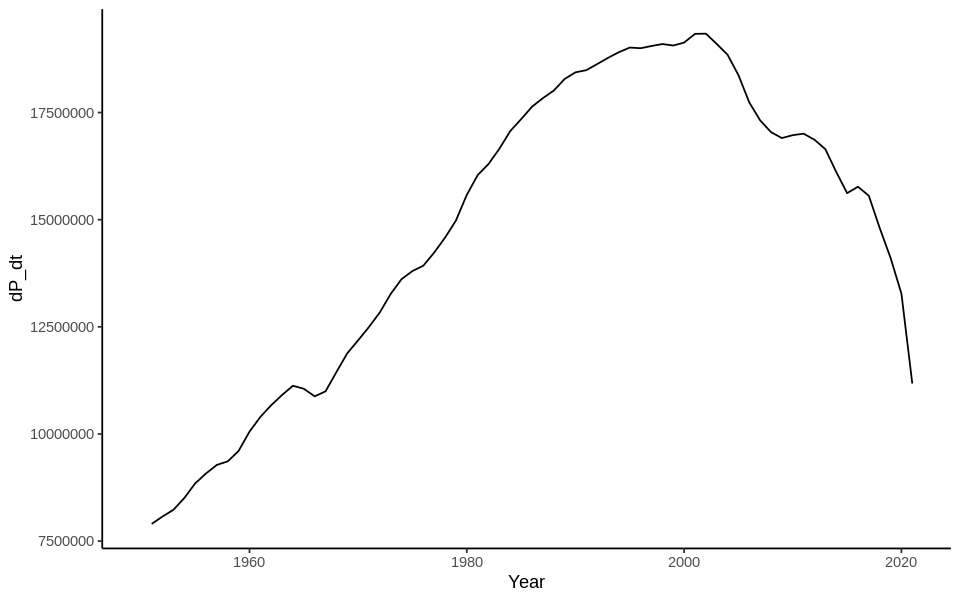

In [46]:
pop.ind %>% mutate(dP_dt = Population - lag(Population)) %>% ggplot(aes(x=Year, y=dP_dt)) + geom_line()

In [47]:
mdl <- pop.ind %>% mutate(dP_dt = Population - lag(Population)) %>% 
    lm(dP_dt / Population ~ Population, .)
summary(mdl)


Call:
lm(formula = dP_dt/Population ~ Population, data = .)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0047353 -0.0014973 -0.0002088  0.0016589  0.0025434 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.857e-02  5.843e-04   48.90   <2e-16 ***
Population  -1.129e-11  6.510e-13  -17.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001788 on 69 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8135,	Adjusted R-squared:  0.8108 
F-statistic: 300.9 on 1 and 69 DF,  p-value: < 2.2e-16


From the formula above, we know that the intercept is the estimate of the growth rate $r$, and the slope is the ratio of the estimated growth rate to the carrying capacity:

In [48]:
r = coefficients(mdl)[1]
K = -r / coefficients(mdl)[2]
c(r, K)

(Intercept)  (Intercept) 
2.857222e-02 2.529960e+09

Now let's compare the fitted growth curve with the observed data:

In [49]:
P0 <- pop.ind %>% head(1) %>% pull(Population)
t0 <- pop.ind %>% head(1) %>% pull(Year)

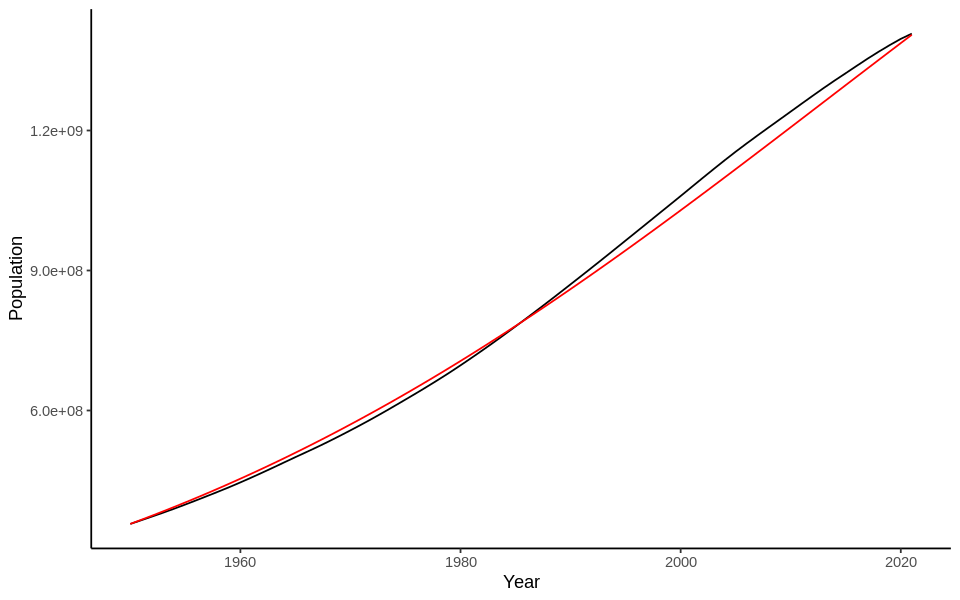

In [50]:
pop.ind %>% 
    mutate(pred_pop = logistic_growth(carrying_cap = K, growth_rate = r, t = Year, 
                                      t0 = t0, initial_size = P0)) %>% 
    ggplot(aes(x = Year)) +  geom_line(aes(y = Population)) + 
    geom_line(aes(y = pred_pop), color = "red")

We can use this model to forecast the population of India into the future:

## 🤔 Quiz

According to this model, what is the predicted population of India in 2050?

<ol style="list-style-type: upper-alpha;">
    <li>1.3-1.4 billion</li>
    <li>1.4-1.5 billion</li>
    <li>1.5-1.6 billion</li>
    <li>1.6-1.7 billion</li>
    <li>1.7-1.8 billion</li>
</ol>

In [ ]:
# forecasting